<a href="https://colab.research.google.com/github/agokmenefe/Data-Science/blob/main/ML/Assignments/Tree_Types_Prediction_Classification_Asssignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


**Name / Data Type / Measurement / Description**

Elevation / quantitative /meters / Elevation in meters

Aspect / quantitative / azimuth / Aspect in degrees azimuth

Slope / quantitative / degrees / Slope in degrees

Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features

Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features

Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway

Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice

Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice

Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice

Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points

Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation

Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / 

Soil Type designation

Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



Name / Data Type / Measurement / Description

Elevation / quantitative /meters / Elevation in meters
Aspect / quantitative / azimuth / Aspect in degrees azimuth
Slope / quantitative / degrees / Slope in degrees
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest 

---

surface water features

Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#### *ii. Load Dataset*

In [3]:
df = pd.read_csv('/content/treetypes.csv')

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


In [5]:
df.shape

(250000, 55)

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

Check for duplicates

In [6]:
df.duplicated().value_counts()

False    247479
True       2521
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(247479, 55)

In [8]:
df.reset_index(drop=True, inplace=True)
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
247474,2112,339,39,49,17,467,107,151,162,435,...,0,0,0,0,0,0,0,0,0,3
247475,2872,90,31,251,147,2027,248,172,27,508,...,0,0,0,0,0,0,0,0,0,5
247476,2336,57,5,0,0,1429,224,228,139,387,...,0,0,0,0,0,0,0,0,0,4
247477,2563,181,10,0,0,1349,223,246,156,1007,...,0,0,0,0,0,0,0,0,0,5
247478,3720,354,17,1112,311,5105,189,208,155,3256,...,0,0,0,0,0,0,0,0,1,7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247479 entries, 0 to 247478
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           247479 non-null  int64
 1   Aspect                              247479 non-null  int64
 2   Slope                               247479 non-null  int64
 3   Horizontal_Distance_To_Hydrology    247479 non-null  int64
 4   Vertical_Distance_To_Hydrology      247479 non-null  int64
 5   Horizontal_Distance_To_Roadways     247479 non-null  int64
 6   Hillshade_9am                       247479 non-null  int64
 7   Hillshade_Noon                      247479 non-null  int64
 8   Hillshade_3pm                       247479 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  247479 non-null  int64
 10  Wilderness_Area_1                   247479 non-null  int64
 11  Wilderness_Area_2                   247479 non-null 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,247479.0,2751.275106,417.898066,1859.0,2379.0,2757.0,3111.0,3857.0
Aspect,247479.0,156.338602,109.781113,0.0,65.0,125.0,261.0,360.0
Slope,247479.0,16.311259,8.312722,0.0,10.0,15.0,22.0,65.0
Horizontal_Distance_To_Hydrology,247479.0,228.699510,209.828664,0.0,67.0,180.0,330.0,1390.0
Vertical_Distance_To_Hydrology,247479.0,50.896783,61.024761,-163.0,5.0,32.0,79.0,598.0
Horizontal_Distance_To_Roadways,247479.0,1725.671467,1333.549780,0.0,759.0,1322.0,2305.0,7112.0
Hillshade_9am,247479.0,212.271813,30.658544,0.0,195.0,219.0,235.0,254.0
Hillshade_Noon,247479.0,218.539343,22.684922,0.0,206.0,222.0,235.0,254.0
Hillshade_3pm,247479.0,134.675815,45.954568,0.0,106.0,137.0,167.0,252.0
Horizontal_Distance_To_Fire_Points,247479.0,1525.651801,1109.576738,0.0,736.0,1275.0,2005.0,7150.0


In [11]:
df.apply(lambda x: x.nunique())

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

In [12]:
numerical_data = [] # numeric continous columns

for col in df.columns:
    if df[col].nunique() > 7 : numerical_data.append(col)
print(numerical_data)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [13]:
categorical_data = [ 'Wilderness_Area', 'Soil_Type' ] # categoric columns
categorical_data

['Wilderness_Area', 'Soil_Type']

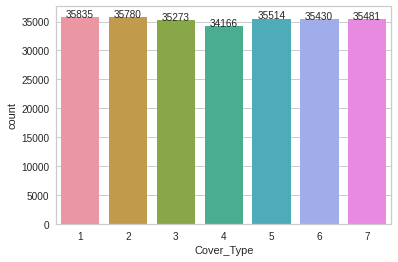

In [14]:
ax = sns.countplot(df.Cover_Type)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1));

In [15]:
df[numerical_data].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,247479.0,2751.275106,417.898066,1859.0,2379.0,2757.0,3111.0,3857.0
Aspect,247479.0,156.338602,109.781113,0.0,65.0,125.0,261.0,360.0
Slope,247479.0,16.311259,8.312722,0.0,10.0,15.0,22.0,65.0
Horizontal_Distance_To_Hydrology,247479.0,228.699510,209.828664,0.0,67.0,180.0,330.0,1390.0
Vertical_Distance_To_Hydrology,247479.0,50.896783,61.024761,-163.0,5.0,32.0,79.0,598.0
Horizontal_Distance_To_Roadways,247479.0,1725.671467,1333.549780,0.0,759.0,1322.0,2305.0,7112.0
Hillshade_9am,247479.0,212.271813,30.658544,0.0,195.0,219.0,235.0,254.0
Hillshade_Noon,247479.0,218.539343,22.684922,0.0,206.0,222.0,235.0,254.0
Hillshade_3pm,247479.0,134.675815,45.954568,0.0,106.0,137.0,167.0,252.0
Horizontal_Distance_To_Fire_Points,247479.0,1525.651801,1109.576738,0.0,736.0,1275.0,2005.0,7150.0


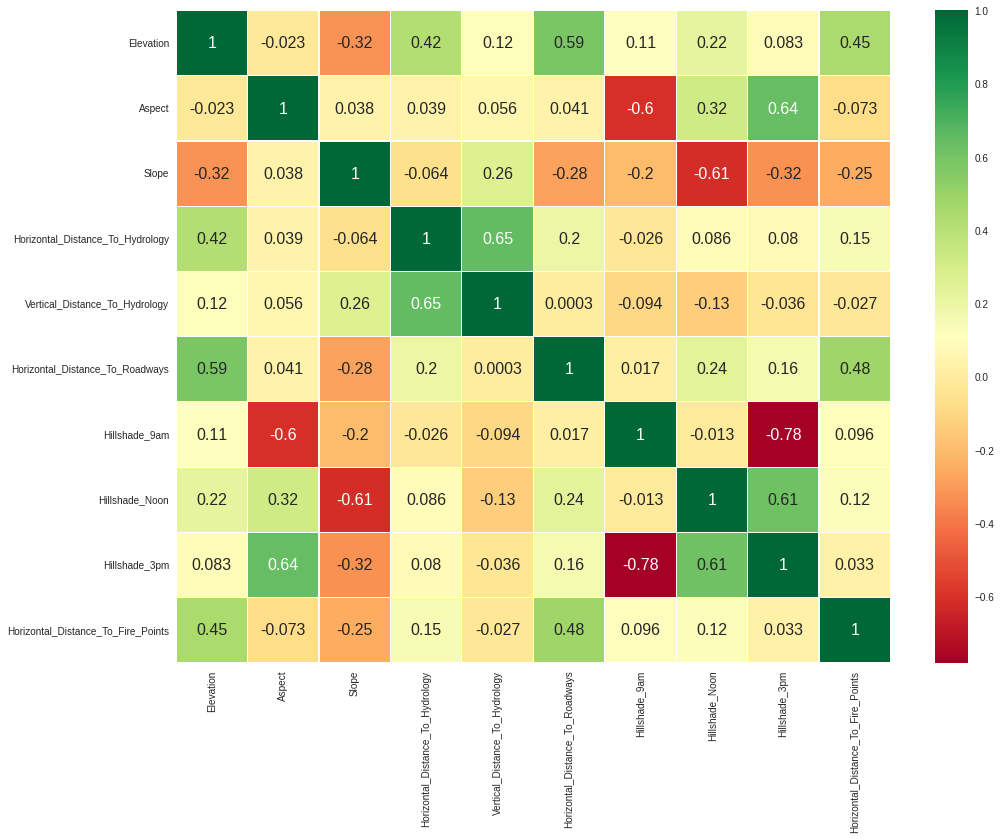

In [16]:
plt.figure(figsize = (16,12))
sns.heatmap(df[numerical_data].corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 16})

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [17]:
df.isnull().sum().any() # There are no feature with a null value

False

In [18]:
df.shape

(247479, 55)

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

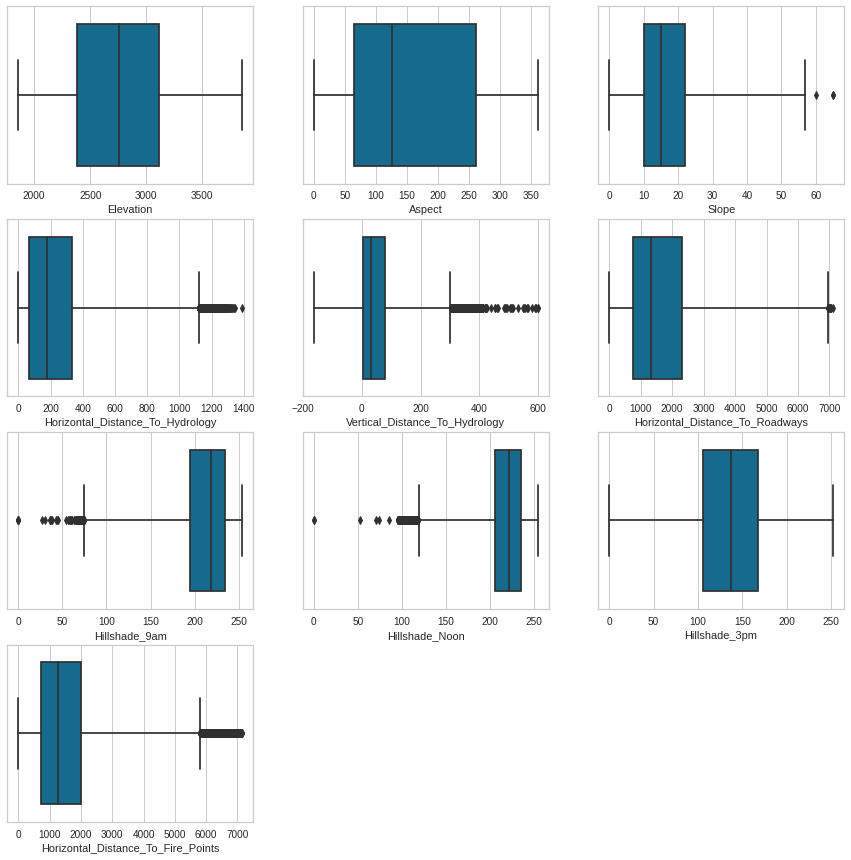

In [19]:
index = 0                          # let's check outliers numeric_features
plt.figure(figsize=(15,15))
for i in numerical_data:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=i, data=df, whis=3)

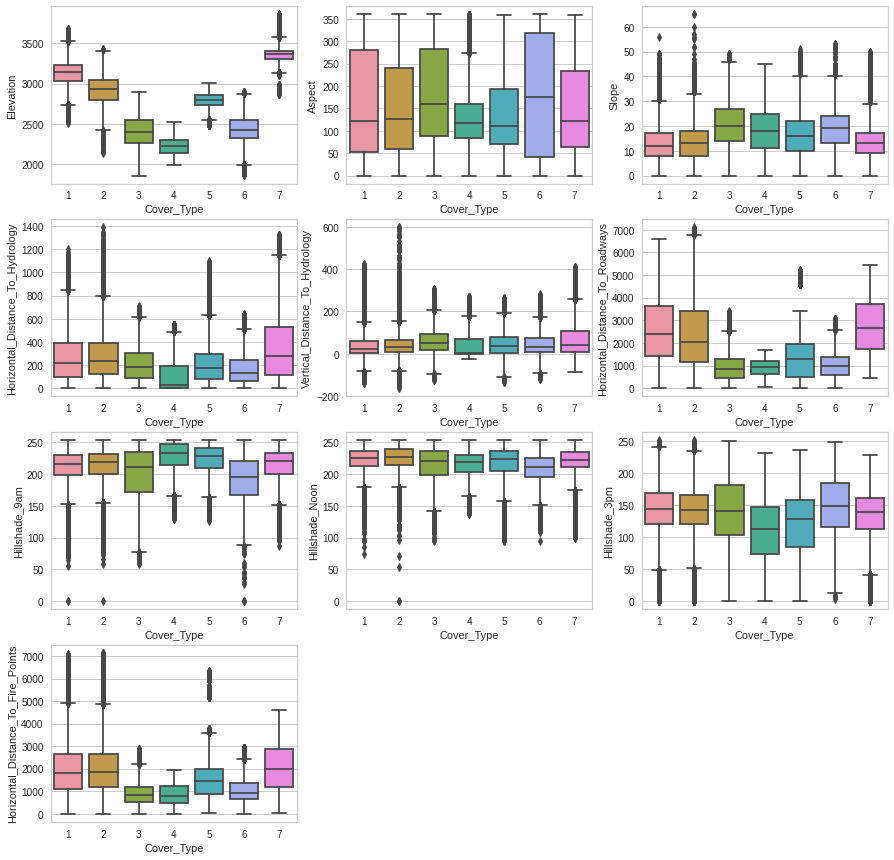

In [20]:
index = 0                          # let's check outliers numerical data with respect to target classes
plt.figure(figsize=(15,15))
for i in  numerical_data:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(y = i, x = "Cover_Type", data = df, whis=1.5)

In [21]:
def is_outlier(x, k):
    upper = np.quantile(x, 0.75)
    lower = np.quantile(x, 0.25)
    iqr = upper - lower
    max_treshold = upper + iqr * k
    min_treshold = lower - iqr * k
    if max_treshold > x.max():
        max_treshold = x.max()
    if min_treshold < x.min():
        min_treshold = x.min()
    print('-----',x.name,'-----')
    print('Upper Limit: ', max_treshold, '\n', 'Lower Limit: ', min_treshold, sep='')
    print('Number of outliers in the lower bound:', len(df[x<min_treshold]))
    print('Number of outliers in the upper bound:', len(df[x>max_treshold]))

In [22]:
for i in df[numerical_data]:
    is_outlier(df[i],3)

----- Elevation -----
Upper Limit: 3857
Lower Limit: 1859
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- Aspect -----
Upper Limit: 360
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- Slope -----
Upper Limit: 58.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 3
----- Horizontal_Distance_To_Hydrology -----
Upper Limit: 1119.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 762
----- Vertical_Distance_To_Hydrology -----
Upper Limit: 301.0
Lower Limit: -163
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 956
----- Horizontal_Distance_To_Roadways -----
Upper Limit: 6943.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 10
----- Hillshade_9am -----
Upper Limit: 254
Lower Limit: 75.0
Number of outliers in the lower bound: 78
N

### Deal with Outliers

#### *ii. Drop Outliers*

In [23]:
def remove_outlier(df_in, col_name,):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-3*iqr
    fence_high = q3+3*iqr
    df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high),col_name]= np.nan

In [24]:
remove_outlier(df, "Slope")

In [25]:
df.Slope.isnull().sum()

3

In [26]:
df.shape

(247479, 55)

In [27]:
remove_outlier(df, "Horizontal_Distance_To_Hydrology")

In [28]:
df.Horizontal_Distance_To_Hydrology.isnull().sum()

762

In [29]:
remove_outlier(df, "Vertical_Distance_To_Hydrology")

In [30]:
df.Vertical_Distance_To_Hydrology.isnull().sum()

956

In [31]:
remove_outlier(df, "Horizontal_Distance_To_Roadways")

In [32]:
df.Horizontal_Distance_To_Roadways.isnull().sum()

10

In [33]:
remove_outlier(df, "Hillshade_9am")

In [34]:
df.Hillshade_9am.isnull().sum()

78

In [35]:
remove_outlier(df, "Hillshade_Noon")

In [36]:
df.Hillshade_Noon.isnull().sum()

194

In [37]:
remove_outlier(df, "Horizontal_Distance_To_Fire_Points")

In [38]:
df.Horizontal_Distance_To_Fire_Points.isnull().sum()

2334

In [39]:
df[numerical_data].isnull().sum()

Elevation                                0
Aspect                                   0
Slope                                    3
Horizontal_Distance_To_Hydrology       762
Vertical_Distance_To_Hydrology         956
Horizontal_Distance_To_Roadways         10
Hillshade_9am                           78
Hillshade_Noon                         194
Hillshade_3pm                            0
Horizontal_Distance_To_Fire_Points    2334
dtype: int64

In [40]:
df.dropna(inplace=True)    # we drop outliers

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243334 entries, 0 to 247477
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           243334 non-null  int64  
 1   Aspect                              243334 non-null  int64  
 2   Slope                               243334 non-null  float64
 3   Horizontal_Distance_To_Hydrology    243334 non-null  float64
 4   Vertical_Distance_To_Hydrology      243334 non-null  float64
 5   Horizontal_Distance_To_Roadways     243334 non-null  float64
 6   Hillshade_9am                       243334 non-null  float64
 7   Hillshade_Noon                      243334 non-null  float64
 8   Hillshade_3pm                       243334 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  243334 non-null  float64
 10  Wilderness_Area_1                   243334 non-null  int64  
 11  Wilderness_Area_2         

### Now, let's take a closer look at correlation of continuous columns.

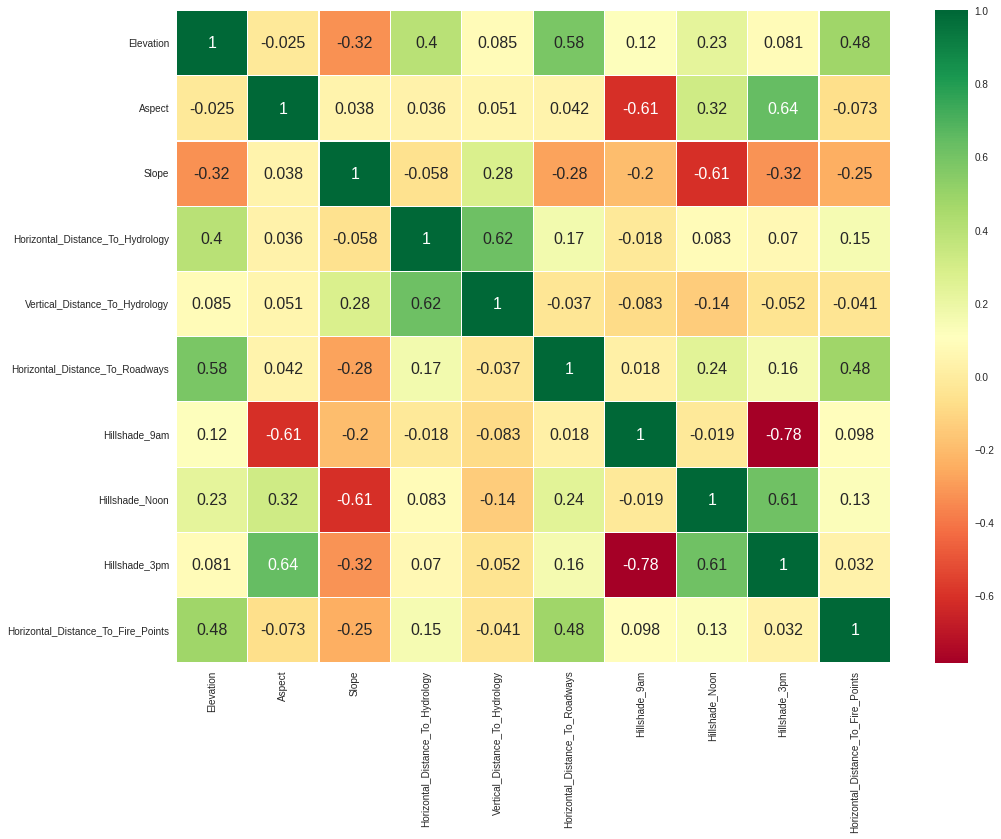

In [42]:
plt.figure(figsize = (16,12))
sns.heatmap(df[numerical_data].corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 16})

In [ ]:
# The corr value has changed among some features

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [43]:
df[numerical_data].T

,0,1,2,3,4,5,6,7,8,9,...,247468,247469,247470,247471,247472,247473,247474,247475,247476,247477
Elevation,2696.0,3269.0,3283.0,2847.0,3248.0,2855.0,2410.0,2151.0,3255.0,2291.0,...,2647.0,3373.0,2131.0,2843.0,2714.0,2611.0,2112.0,2872.0,2336.0,2563.0
Aspect,123.0,110.0,322.0,89.0,93.0,162.0,331.0,337.0,357.0,32.0,...,345.0,93.0,20.0,198.0,127.0,111.0,339.0,90.0,57.0,181.0
Slope,10.0,19.0,18.0,31.0,12.0,5.0,21.0,30.0,19.0,7.0,...,20.0,12.0,18.0,9.0,11.0,14.0,39.0,31.0,5.0,10.0
Horizontal_Distance_To_Hydrology,212.0,134.0,346.0,270.0,507.0,85.0,124.0,67.0,339.0,0.0,...,195.0,574.0,162.0,857.0,0.0,345.0,49.0,251.0,0.0,0.0
Vertical_Distance_To_Hydrology,48.0,40.0,104.0,175.0,118.0,4.0,66.0,31.0,120.0,0.0,...,36.0,216.0,40.0,67.0,0.0,66.0,17.0,147.0,0.0,0.0
Horizontal_Distance_To_Roadways,2245.0,3734.0,4369.0,1320.0,570.0,2899.0,423.0,784.0,3829.0,487.0,...,2063.0,1409.0,300.0,2283.0,1444.0,1561.0,467.0,2027.0,1429.0,1349.0
Hillshade_9am,237.0,249.0,170.0,248.0,239.0,224.0,165.0,137.0,185.0,218.0,...,175.0,239.0,204.0,217.0,238.0,243.0,107.0,248.0,224.0,223.0
Hillshade_Noon,231.0,216.0,217.0,173.0,221.0,241.0,207.0,180.0,199.0,224.0,...,202.0,220.0,198.0,248.0,232.0,223.0,151.0,172.0,228.0,246.0
Hillshade_3pm,123.0,88.0,185.0,29.0,110.0,151.0,177.0,172.0,148.0,142.0,...,162.0,109.0,126.0,164.0,122.0,106.0,162.0,27.0,139.0,156.0
Horizontal_Distance_To_Fire_Points,2113.0,3960.0,1330.0,889.0,945.0,2568.0,589.0,491.0,3564.0,831.0,...,2517.0,989.0,404.0,1620.0,1378.0,1789.0,435.0,508.0,387.0,1007.0


In [44]:
# 1. Produce Hypotenuse of horizantal and vertical distances.
  
Hypotenuse_Distance_Hydrology = np.hypot(df.Horizontal_Distance_To_Hydrology, df.Vertical_Distance_To_Hydrology)
df["Hypotenuse_Distance_Hydrology"] = pd.DataFrame(Hypotenuse_Distance_Hydrology)

In [45]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypotenuse_Distance_Hydrology
0,2696,123,10.0,212.0,48.0,2245.0,237.0,231.0,123,2113.0,...,0,0,0,0,0,0,0,0,6,217.366051
1,3269,110,19.0,134.0,40.0,3734.0,249.0,216.0,88,3960.0,...,0,0,0,0,0,1,0,0,1,139.842769
2,3283,322,18.0,346.0,104.0,4369.0,170.0,217.0,185,1330.0,...,0,0,0,0,0,1,0,0,7,361.292126
3,2847,89,31.0,270.0,175.0,1320.0,248.0,173.0,29,889.0,...,0,0,0,0,0,0,0,0,5,321.753011
4,3248,93,12.0,507.0,118.0,570.0,239.0,221.0,110,945.0,...,0,0,0,0,0,0,0,0,7,520.550670


In [46]:
import math

In [49]:
df["Slope"].apply(lambda x: math.cos(x))

0        -0.839072
1         0.988705
2         0.660317
3         0.914742
4         0.843854
            ...   
247473    0.136737
247474    0.266643
247475    0.914742
247476    0.283662
247477   -0.839072
Name: Slope, Length: 243334, dtype: float64

In [48]:
math.cos(df["Slope"])

TypeError: ignored

In [50]:
# 2. Produce Hypotenuse from Horizontal_Distance_To_Roadways and Slope.
  
Hypotenuse_Distance_Roadways = df["Horizontal_Distance_To_Roadways"]/df["Slope"].apply(lambda x: math.cos(x))
df["Hypotenuse_Distance_Roadways"] = pd.DataFrame(Hypotenuse_Distance_Roadways)

In [51]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypotenuse_Distance_Hydrology,Hypotenuse_Distance_Roadways
0,2696,123,10.0,212.0,48.0,2245.0,237.0,231.0,123,2113.0,...,0,0,0,0,0,0,0,6,217.366051,-2675.576423
1,3269,110,19.0,134.0,40.0,3734.0,249.0,216.0,88,3960.0,...,0,0,0,0,1,0,0,1,139.842769,3776.658803
2,3283,322,18.0,346.0,104.0,4369.0,170.0,217.0,185,1330.0,...,0,0,0,0,1,0,0,7,361.292126,6616.521959
3,2847,89,31.0,270.0,175.0,1320.0,248.0,173.0,29,889.0,...,0,0,0,0,0,0,0,5,321.753011,1443.029273
4,3248,93,12.0,507.0,118.0,570.0,239.0,221.0,110,945.0,...,0,0,0,0,0,0,0,7,520.550670,675.472330


In [52]:
# 3. Produce Hypotenuse from Horizontal_Distance_To_Fire_Points and Slope.
  
Hypotenuse_Distance_Firepoints = df["Horizontal_Distance_To_Fire_Points"]/df["Slope"].apply(lambda x: math.cos(x))
df["Hypotenuse_Distance_Firepoints"] = pd.DataFrame(Hypotenuse_Distance_Firepoints)

In [53]:
df.head().T

,0,1,2,3,4
Elevation,2696.000000,3269.000000,3283.000000,2847.000000,3248.000000
Aspect,123.000000,110.000000,322.000000,89.000000,93.000000
Slope,10.000000,19.000000,18.000000,31.000000,12.000000
Horizontal_Distance_To_Hydrology,212.000000,134.000000,346.000000,270.000000,507.000000
Vertical_Distance_To_Hydrology,48.000000,40.000000,104.000000,175.000000,118.000000
Horizontal_Distance_To_Roadways,2245.000000,3734.000000,4369.000000,1320.000000,570.000000
Hillshade_9am,237.000000,249.000000,170.000000,248.000000,239.000000
Hillshade_Noon,231.000000,216.000000,217.000000,173.000000,221.000000
Hillshade_3pm,123.000000,88.000000,185.000000,29.000000,110.000000
Horizontal_Distance_To_Fire_Points,2113.000000,3960.000000,1330.000000,889.000000,945.000000


In [54]:
# 4.  Produce&transform an additional column which contains average of Hypotenuse Distances.

df['Average_Distance'] = df[['Hypotenuse_Distance_Hydrology', 'Hypotenuse_Distance_Roadways', 'Hypotenuse_Distance_Firepoints']].mean(axis=1)

In [56]:
df.head().T

,0,1,2,3,4
Elevation,2696.000000,3269.000000,3283.000000,2847.000000,3248.000000
Aspect,123.000000,110.000000,322.000000,89.000000,93.000000
Slope,10.000000,19.000000,18.000000,31.000000,12.000000
Horizontal_Distance_To_Hydrology,212.000000,134.000000,346.000000,270.000000,507.000000
Vertical_Distance_To_Hydrology,48.000000,40.000000,104.000000,175.000000,118.000000
Horizontal_Distance_To_Roadways,2245.000000,3734.000000,4369.000000,1320.000000,570.000000
Hillshade_9am,237.000000,249.000000,170.000000,248.000000,239.000000
Hillshade_Noon,231.000000,216.000000,217.000000,173.000000,221.000000
Hillshade_3pm,123.000000,88.000000,185.000000,29.000000,110.000000
Horizontal_Distance_To_Fire_Points,2113.000000,3960.000000,1330.000000,889.000000,945.000000


In [ ]:
# 3 . Produce&transform an additional column which contains average of Elevation and Vertical_Distance_To_Hydrology columns.

##df['Average_Distance_Elevation_VerHydrology'] = df[['Vertical_Distance_To_Hydrology', 'Elevation']].mean(axis=1)

In [ ]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypotenuse_Distance_Hydrology,Average_Distance_Hydrology_Roadways,Average_Distance_Elevation_VerHydrology
0,2696,123,10.0,212.0,48.0,2245.0,237.0,231.0,123,2113.0,...,0,0,0,0,0,0,6,217.366051,1228.5,1372.0
1,3269,110,19.0,134.0,40.0,3734.0,249.0,216.0,88,3960.0,...,0,0,0,1,0,0,1,139.842769,1934.0,1654.5
2,3283,322,18.0,346.0,104.0,4369.0,170.0,217.0,185,1330.0,...,0,0,0,1,0,0,7,361.292126,2357.5,1693.5
3,2847,89,31.0,270.0,175.0,1320.0,248.0,173.0,29,889.0,...,0,0,0,0,0,0,5,321.753011,795.0,1511.0
4,3248,93,12.0,507.0,118.0,570.0,239.0,221.0,110,945.0,...,0,0,0,0,0,0,7,520.550670,538.5,1683.0


In [57]:
 # 5 . We can drop Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points columns because we formed hypotenuse distance features.
 ## As we can calculate Aspect, Slope and Elevation from Hillside columns(they are same), we can also drop Hillshade_9am, Hillshade_Noon, Hillshade_3pm columns.
    
df.drop (['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Hydrology','Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'], inplace=True, axis=1)   

In [59]:
df.head().T

,0,1,2,3,4
Elevation,2696.000000,3269.000000,3283.000000,2847.000000,3248.000000
Aspect,123.000000,110.000000,322.000000,89.000000,93.000000
Slope,10.000000,19.000000,18.000000,31.000000,12.000000
Wilderness_Area_1,0.000000,1.000000,1.000000,0.000000,0.000000
Wilderness_Area_2,0.000000,0.000000,0.000000,0.000000,0.000000
Wilderness_Area_3,1.000000,0.000000,0.000000,1.000000,1.000000
Wilderness_Area_4,0.000000,0.000000,0.000000,0.000000,0.000000
Soil_Type_1,0.000000,0.000000,0.000000,0.000000,0.000000
Soil_Type_2,0.000000,0.000000,0.000000,0.000000,0.000000
Soil_Type_3,0.000000,0.000000,0.000000,0.000000,0.000000


In [62]:
# reorder columns
df = df.reindex(list(df.columns[:3])+['Hypotenuse_Distance_Hydrology', 'Hypotenuse_Distance_Roadways', 'Hypotenuse_Distance_Firepoints', 'Average_Distance']+list(df.columns[7:-4]), axis=1)

In [63]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Hypotenuse_Distance_Hydrology',
       'Hypotenuse_Distance_Roadways', 'Hypotenuse_Distance_Firepoints',
       'Average_Distance', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39',
       'Soil_Type_40', 'Cover_Type'],
      dtype='object')

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.tree import plot_tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [65]:
X = df.drop(["Cover_Type"],axis=1) # Features
y = df["Cover_Type"] # Target

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [67]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [68]:
modelSVC = LinearSVC(class_weight = "balanced",random_state=101)

In [69]:
modelSVC.fit(X_train_scaled, y_train)

LinearSVC(class_weight='balanced', random_state=101)

In [70]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [71]:
y_pred = modelSVC.predict(X_test_scaled)

SVC_acc = accuracy_score(y_test, y_pred)
SVC_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(modelSVC, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[6732 1827   12    2  588   85 1301]
 [2852 4955  199   43 1781  389   62]
 [   0   24 5047 1896  417 3173    0]
 [   0    0 1280 8420   17  533    0]
 [ 699 2525  970   43 5493  720    0]
 [  29  620 1966 1786  720 5498    0]
 [1529    0   40    0   80    0 8648]]
              precision    recall  f1-score   support

           1       0.57      0.64      0.60     10547
           2       0.50      0.48      0.49     10281
           3       0.53      0.48      0.50     10557
           4       0.69      0.82      0.75     10250
           5       0.60      0.53      0.56     10450
           6       0.53      0.52      0.52     10619
           7       0.86      0.84      0.85     10297

    accuracy                           0.61     73001
   macro avg       0.61      0.61      0.61     73001
weighted avg       0.61      0.61      0.61     73001


Train_Set
[[15824  4216    23     6  1351   194  2994]
 [ 6414 11616   474   116  4156  1060   152]
 [    0    57 11646  4386 

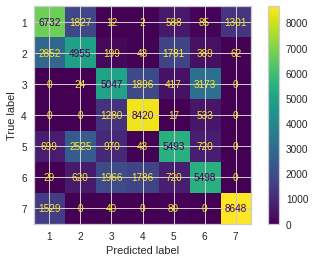

In [72]:
plot_confusion_matrix(modelSVC,X_test_scaled,y_test);

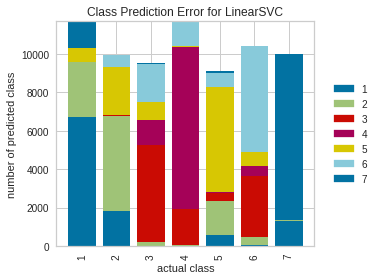

In [73]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(modelSVC)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

Grid Search with LinearSVC

In [96]:
linearsvc = LinearSVC()

param_grid = { 'penalty':['l2'],
                'C':[35,36,37,38,39],
               'random_state': [101],}
gridlinearSVC = GridSearchCV(linearsvc, param_grid, cv=5)

In [97]:
gridlinearSVC.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [35, 36, 37, 38, 39], 'penalty': ['l2'],
                         'random_state': [101]})

In [98]:
gridlinearSVC.best_params_

{'C': 37, 'penalty': 'l2', 'random_state': 101}

In [ ]:
linearsvc = LinearSVC(C=10, random_state=101)
linearsvc.fit(X_train_scaled, y_train)
eval_metric(linearsvc, X_train_scaled, y_train, X_test_scaled, y_test)

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [99]:
# scaling is not needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101) 

In [100]:
DT_model = DecisionTreeClassifier(random_state=101)

In [101]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [102]:
y_pred = DT_model.predict(X_test)

Model Performance on Classification Tasks

In [103]:
DT_acc = accuracy_score(y_test, y_pred)
DT_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 7673  2114    12     0   137    30   581]
 [ 2150  7055   210     1   560   232    73]
 [    6   197  9075   213    77   988     1]
 [    0     0   136 10028     1    85     0]
 [   98   318    48     0  9936    48     2]
 [   24   160   903   103    50  9379     0]
 [  424    49     0     0     0     0  9824]]
              precision    recall  f1-score   support

           1       0.74      0.73      0.73     10547
           2       0.71      0.69      0.70     10281
           3       0.87      0.86      0.87     10557
           4       0.97      0.98      0.97     10250
           5       0.92      0.95      0.94     10450
           6       0.87      0.88      0.88     10619
           7       0.94      0.95      0.95     10297

    accuracy                           0.86     73001
   macro avg       0.86      0.86      0.86     73001
weighted avg       0.86      0.86      0.86     73001


Train_Set
[[24608     0     0     0     0     0     0]
 [    0 23988     0   

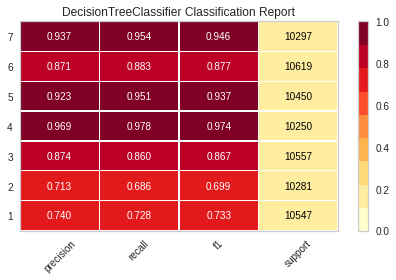

In [104]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(DT_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

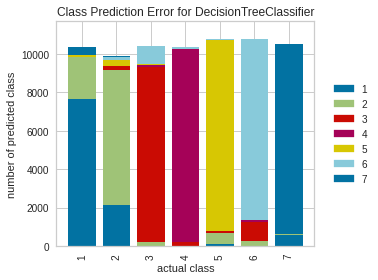

In [105]:
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

Cross Validate

In [106]:
model = DecisionTreeClassifier(random_state=101)     

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.649102,0.039648,0.860867,0.860867,0.860867,0.860867
2,2.590513,0.038625,0.854115,0.854115,0.854115,0.854115
3,2.665401,0.038348,0.857109,0.857109,0.857109,0.857109
4,2.649691,0.039749,0.859684,0.859684,0.859684,0.859684
5,2.597890,0.039131,0.861269,0.861269,0.861269,0.861269
6,2.659816,0.038836,0.859214,0.859214,0.859214,0.859214
7,2.604955,0.039281,0.856220,0.856220,0.856220,0.856220
8,2.608058,0.039354,0.858216,0.858216,0.858216,0.858216
9,2.579544,0.036343,0.855927,0.855927,0.855927,0.855927
10,2.527144,0.045257,0.859860,0.859860,0.859860,0.859860


In [107]:
df_scores.mean()[2:]

test_accuracy           0.858248
test_precision_micro    0.858248
test_recall_micro       0.858248
test_f1_micro           0.858248
dtype: float64

Feature Importance

In [108]:
DT_model.feature_importances_

array([4.53487632e-01, 9.70325451e-02, 5.34588312e-02, 1.10022945e-01,
       4.49907632e-02, 4.21061611e-02, 2.96518038e-02, 2.07127256e-03,
       7.48718825e-03, 1.85808744e-02, 1.56423109e-02, 1.62121897e-03,
       3.15042146e-03, 0.00000000e+00, 1.64388862e-05, 5.57444745e-04,
       3.90295342e-02, 2.17931992e-03, 1.08614757e-02, 4.80245354e-03,
       5.03504445e-04, 0.00000000e+00, 1.20243964e-03, 2.66440579e-03,
       2.05333417e-03, 4.46123867e-04, 2.77576047e-03, 7.60481691e-05,
       4.36567942e-03, 4.79240626e-03, 2.51167194e-03, 1.86246788e-04,
       4.03106449e-04, 9.29736040e-05, 3.08826074e-04, 9.69596310e-03,
       4.77486266e-03, 3.50559944e-03, 5.52550455e-03, 4.65964114e-03,
       8.25322597e-04, 1.01458185e-03, 3.66200170e-05, 0.00000000e+00,
       3.83055730e-03, 5.81361835e-03, 1.18456740e-03])

In [109]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Soil_Type_15,0.000000
Soil_Type_37,0.000000
Soil_Type_7,0.000000
Soil_Type_8,0.000016
Soil_Type_36,0.000037
Soil_Type_21,0.000076
Soil_Type_27,0.000093
Soil_Type_25,0.000186
Soil_Type_28,0.000309
Soil_Type_26,0.000403


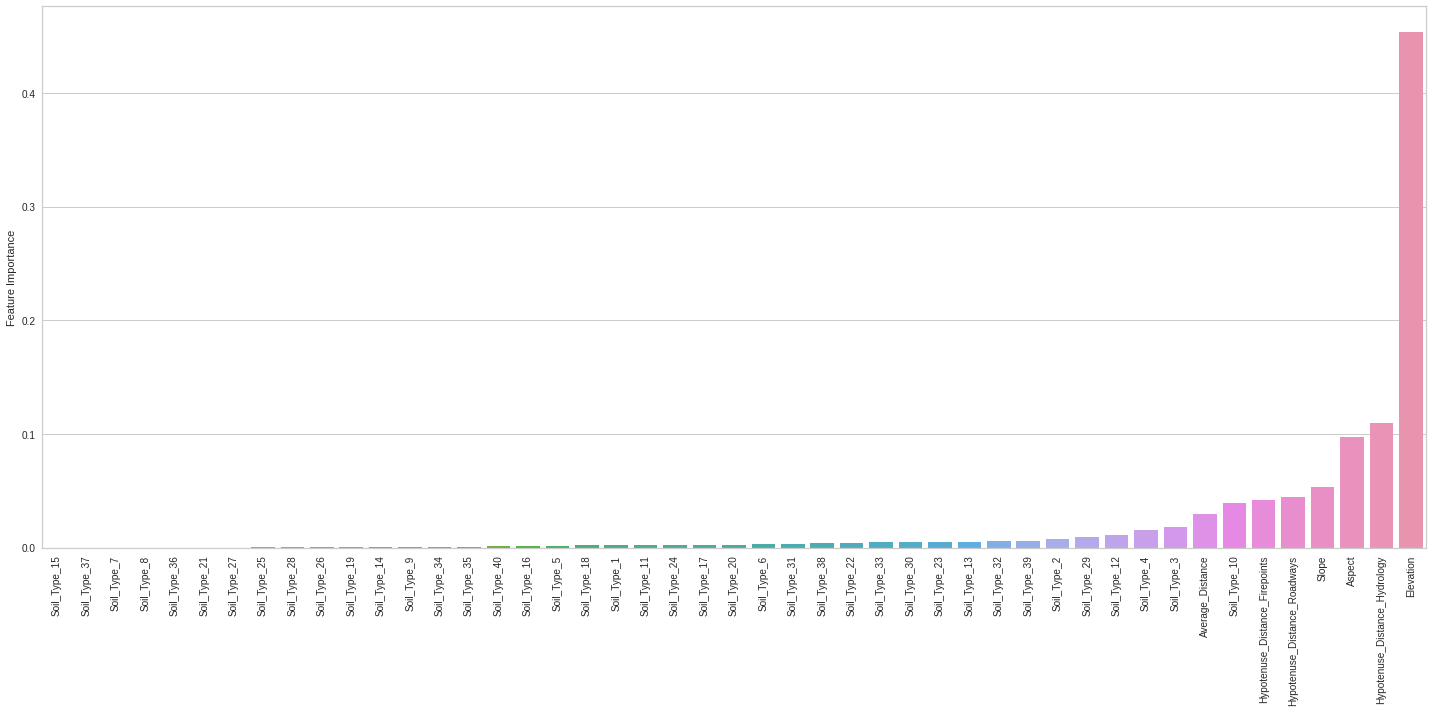

In [110]:
plt.figure(figsize=(20,10))
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

Drop most important feature

In [111]:
X2 = X.drop(columns = ["Elevation"]) 

In [112]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=101)


In [113]:
DT2_model = DecisionTreeClassifier(random_state=101)


In [114]:
DT2_model.fit(X_train2, y_train2) 


DecisionTreeClassifier(random_state=101)

In [115]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)


Test_Set
[[6665 2558   66   17  441  148  652]
 [2667 6137  301   30  596  328  222]
 [  47  239 8330  370  193 1332   46]
 [  18   14  279 9604   49  272   14]
 [ 296  386  150   64 9341  144   69]
 [  88  256 1176  351  193 8514   41]
 [ 531  114   45   15   73   50 9469]]
              precision    recall  f1-score   support

           1       0.65      0.63      0.64     10547
           2       0.63      0.60      0.61     10281
           3       0.81      0.79      0.80     10557
           4       0.92      0.94      0.93     10250
           5       0.86      0.89      0.88     10450
           6       0.79      0.80      0.80     10619
           7       0.90      0.92      0.91     10297

    accuracy                           0.80     73001
   macro avg       0.79      0.80      0.79     73001
weighted avg       0.79      0.80      0.79     73001


Train_Set
[[24608     0     0     0     0     0     0]
 [    0 23988     0     0     0     0     0]
 [    0     0 24634     0 

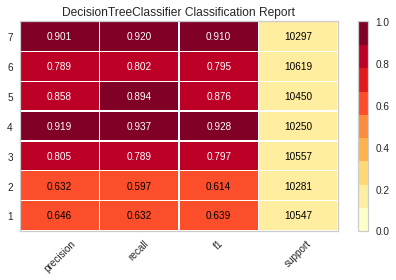

In [116]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(DT2_model, support=True)
visualizer.fit(X_train2, y_train2)        
visualizer.score(X_test2, y_test2)        
visualizer.show()

In [117]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.996632,0.041628,0.785840,0.785840,0.785840,0.785840
2,2.979837,0.044984,0.787954,0.787954,0.787954,0.787954
3,2.970703,0.039359,0.787895,0.787895,0.787895,0.787895
4,2.934767,0.041672,0.787002,0.787002,0.787002,0.787002
5,2.972206,0.042442,0.788293,0.788293,0.788293,0.788293
6,2.967518,0.042711,0.786532,0.786532,0.786532,0.786532
7,2.937882,0.040078,0.786180,0.786180,0.786180,0.786180
8,2.958493,0.039030,0.796219,0.796219,0.796219,0.796219
9,2.899395,0.038715,0.791464,0.791464,0.791464,0.791464
10,2.880323,0.038783,0.786591,0.786591,0.786591,0.786591


In [118]:
df_scores.mean()[2:]

test_accuracy           0.788397
test_precision_micro    0.788397
test_recall_micro       0.788397
test_f1_micro           0.788397
dtype: float64

Grid Search

In [119]:
model = DecisionTreeClassifier(random_state=101)

In [133]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 4, 5,6, 7],    
              "max_depth": [None,2,3, 4, 5],                              
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [134]:
dt_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=5,
                          n_jobs = -1)

In [135]:
dt_grid_model.fit(X_train, y_train)

PicklingError: ignored

In [126]:
dt_grid_model.best_params_  

AttributeError: ignored

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(dt_grid_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [ ]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

ROC/AUC

In [130]:
from yellowbrick.classifier import ROCAUC

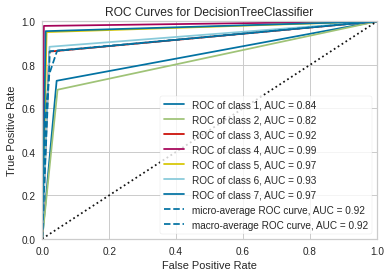

In [131]:
dt_model = DecisionTreeClassifier()
visualizer = ROCAUC(dt_model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show();  

In [132]:
visualizer = ROCAUC(dt_grid_model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show(); 

PicklingError: ignored

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [136]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [137]:
y_pred = rf_model.predict(X_test)

RF_acc = accuracy_score(y_test, y_pred)
RF_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 8651  1247    11     0   113    18   507]
 [ 1541  7898   187     0   390   223    42]
 [    1    31  9617   188    51   669     0]
 [    0     1    21 10198     0    30     0]
 [    6    89    27     0 10293    35     0]
 [    3    22   399    99    31 10065     0]
 [  138     6     0     0     0     0 10153]]
              precision    recall  f1-score   support

           1       0.84      0.82      0.83     10547
           2       0.85      0.77      0.81     10281
           3       0.94      0.91      0.92     10557
           4       0.97      0.99      0.98     10250
           5       0.95      0.98      0.97     10450
           6       0.91      0.95      0.93     10619
           7       0.95      0.99      0.97     10297

    accuracy                           0.92     73001
   macro avg       0.91      0.92      0.91     73001
weighted avg       0.91      0.92      0.91     73001


Train_Set
[[24608     0     0     0     0     0     0]
 [    0 23988     0   

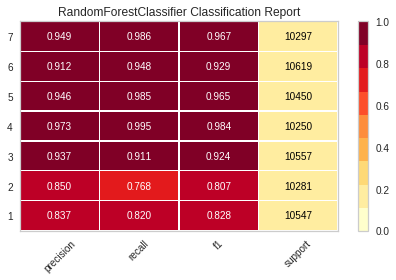

In [138]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

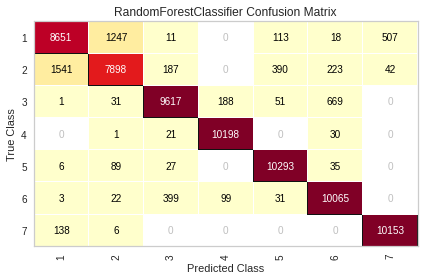

In [139]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

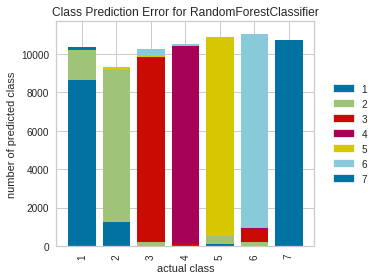

In [140]:
visualizer = ClassPredictionError(rf_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

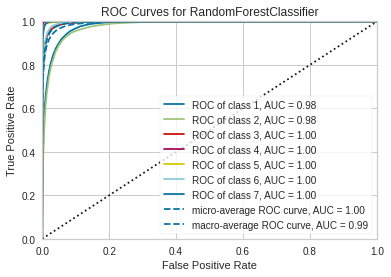

In [141]:
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show(); 

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [142]:
from xgboost import XGBClassifier

In [143]:
xgb = XGBClassifier(random_state=101 ,eval_metric='mlogloss').fit(X_train, y_train)


In [144]:
y_pred = rf_model.predict(X_test)

XGB_acc = accuracy_score(y_test, y_pred)
XGB_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[6972 1246   20    0  703   60 1546]
 [2640 3910  203    2 2844  515  167]
 [   0    5 6786  990  365 2411    0]
 [   0    0  260 9797    0  193    0]
 [ 101  395  313    0 9198  443    0]
 [   0    1 2561  495  392 7170    0]
 [ 754    0    0    0   18    0 9525]]
              precision    recall  f1-score   support

           1       0.67      0.66      0.66     10547
           2       0.70      0.38      0.49     10281
           3       0.67      0.64      0.66     10557
           4       0.87      0.96      0.91     10250
           5       0.68      0.88      0.77     10450
           6       0.66      0.68      0.67     10619
           7       0.85      0.93      0.88     10297

    accuracy                           0.73     73001
   macro avg       0.73      0.73      0.72     73001
weighted avg       0.73      0.73      0.72     73001


Train_Set
[[16230  2875    40     0  1711   134  3618]
 [ 5944  9277   494     4  6542  1292   435]
 [    0     2 15971  2278 

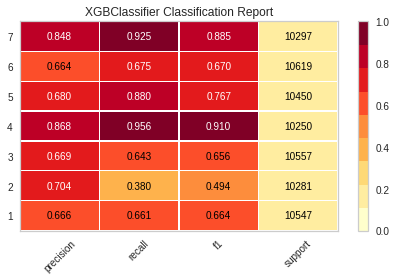

In [145]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(xgb, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

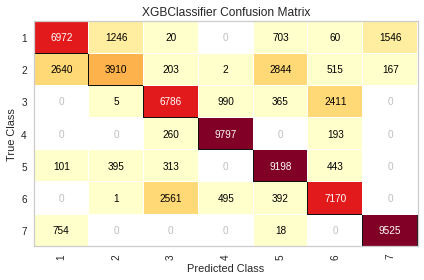

In [146]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

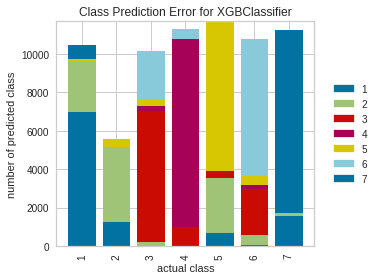

In [147]:
visualizer = ClassPredictionError(xgb)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

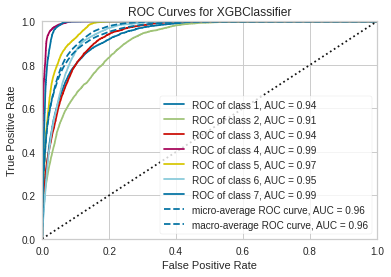

In [148]:
visualizer = ROCAUC(xgb)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show(); 

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy and F1 Score Comparison

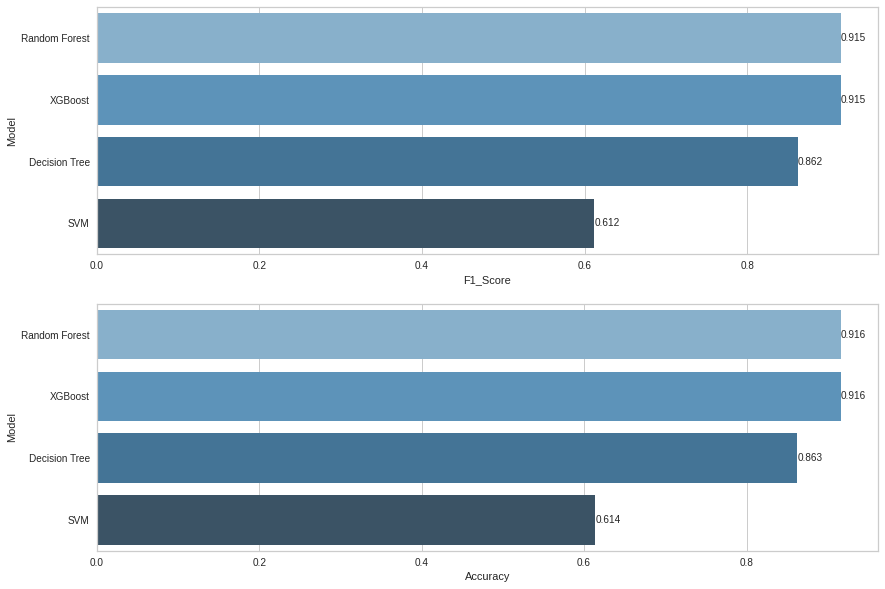

In [149]:
compare = pd.DataFrame({"Model": ["SVM", "Decision Tree", "Random Forest", "XGBoost"],
                        "F1_Score": [SVC_f1, DT_f1, RF_f1, XGB_f1],
                        "Accuracy": [SVC_acc, DT_acc, RF_acc, XGB_acc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(211)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(212)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

Since the random forest model, which has the highest accuracy and f1 score, is more efficient in terms of speed and cost, I chose to apply the random forest model.

# Modeling and Prediction

In [150]:
import pickle   

In [151]:
# we select random Forest Model
final_model = RandomForestClassifier(class_weight="balanced", random_state=101).fit(X, y) 

In [152]:
pickle.dump(final_model, open("final_model_tree_types", 'wb'))

In [153]:
my_dict = {"Elevation": 2800,
           "Aspect": 180,
           "Slope": 22,
           "Horizontal_Distance_To_Hydrology": 120,
           "Vertical_Distance_To_Hydrology": 45,
           "Horizontal_Distance_To_Roadways": 2600,
           "Hillshade_9am": 201,
           "Hillshade_Noon": 262,
           "Hillshade_3pm": 120,
           "Horizontal_Distance_To_Fire_Points": 3200,
           "Wilderness": "Area4",
           "Soil": "Type20"
          }

In [154]:
my_dict = pd.DataFrame([my_dict])
my_dict

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness,Soil
0,2800,180,22,120,45,2600,201,262,120,3200,Area4,Type20


In [155]:
my_dict = pd.get_dummies(my_dict).reindex(columns=X.columns, fill_value=0)
my_dict

,Elevation,Aspect,Slope,Hypotenuse_Distance_Hydrology,Hypotenuse_Distance_Roadways,Hypotenuse_Distance_Firepoints,Average_Distance,Soil_Type_1,Soil_Type_2,Soil_Type_3,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2800,180,22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
final_model.predict(my_dict)

array([5])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___